In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
data= pd.read_csv("/content/People Charm case.csv")
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.shape

(14999, 10)

In [5]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
data.duplicated().sum()

3008

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(11991, 10)

In [9]:
data.skew()

<ipython-input-9-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()                                       #Creating a label-encoder obj
data['dept1']= x1.fit_transform(data['dept'])     #Fitting the label obj to the data
data['salary1']= x1.fit_transform(data['salary']) #Fitting the label obj to the data
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary,dept1,salary1
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.37,0.52,2,159,3,0,1,0,sales,low,7,1
4,0.41,0.50,2,153,3,0,1,0,sales,low,7,1


In [11]:
data.drop(columns=["dept","salary"],inplace=True)

In [12]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept1,salary1
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [13]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept1,salary1
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,5.871153,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.899022,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


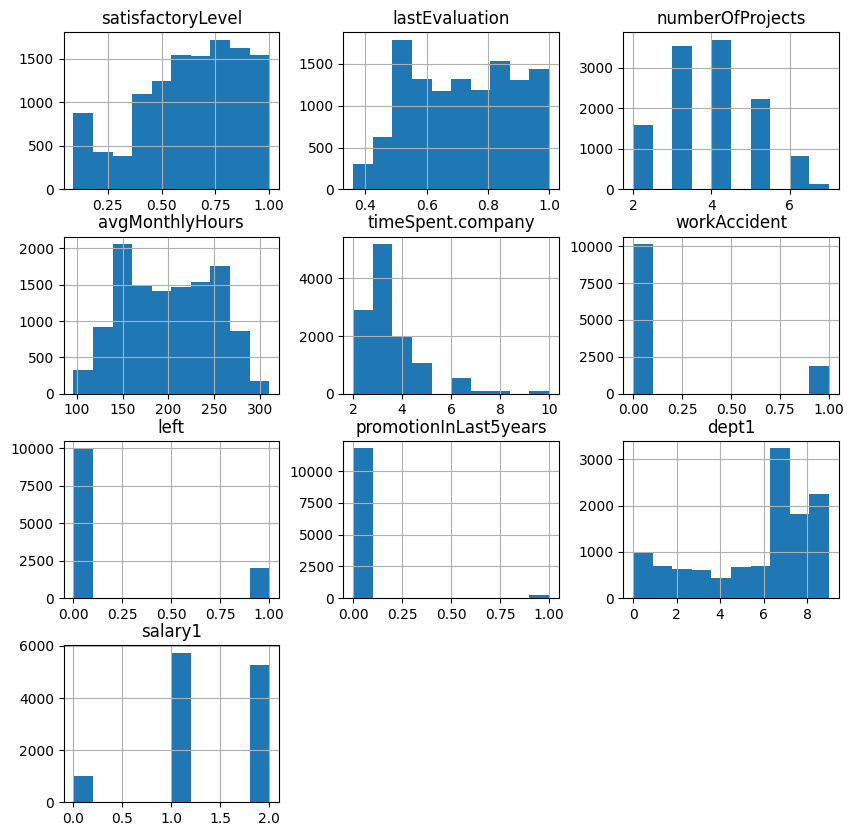

In [14]:
data.hist(figsize=(10, 10))
plt.show()

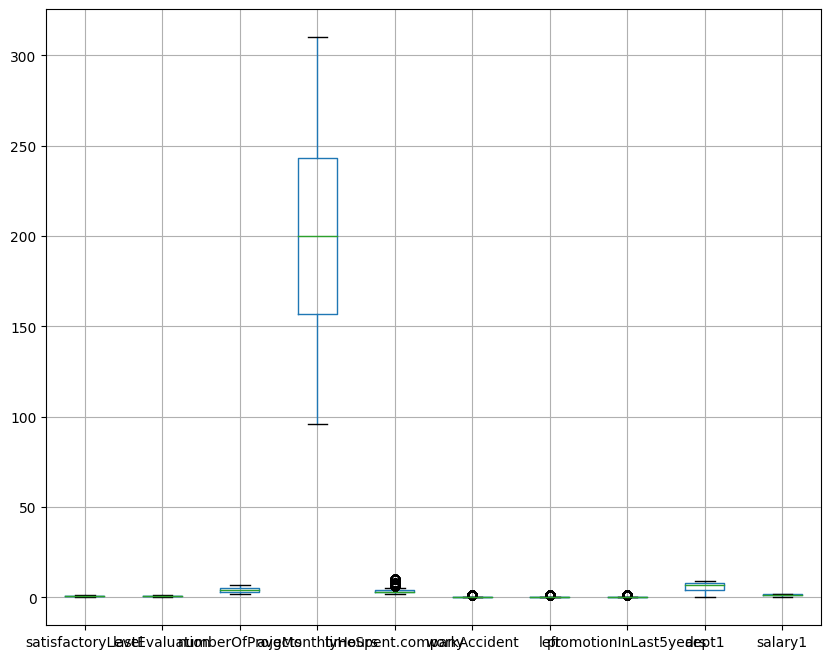

In [15]:
# Box plot before normalization of data
plt.figure(figsize=(10, 8))
data.boxplot()
plt.show()

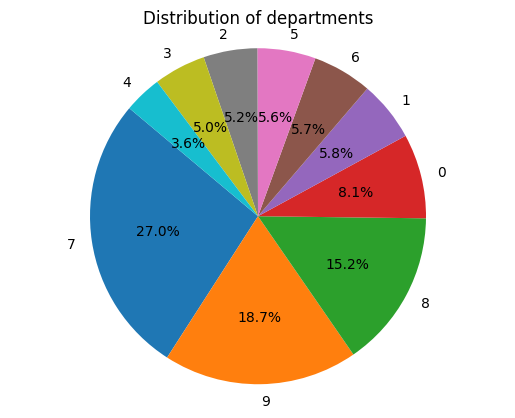

In [16]:
dept_counts = data['dept1'].value_counts()

# Plotting the pie chart
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<Axes: ylabel='satisfactoryLevel'>

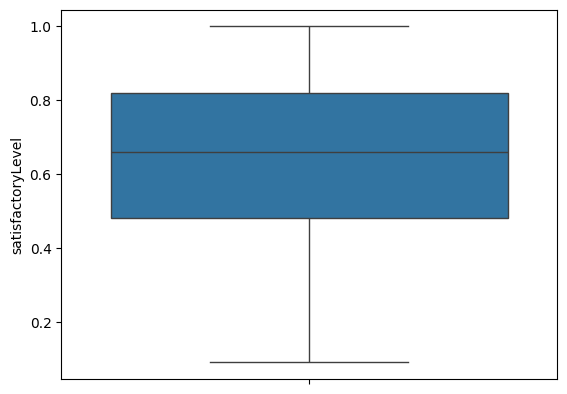

In [17]:
#Sub-setting the Data:
data1= data[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left','promotionInLast5years']]
#Outlier Analysis
sns.boxplot(data1['satisfactoryLevel'])

<Axes: ylabel='lastEvaluation'>

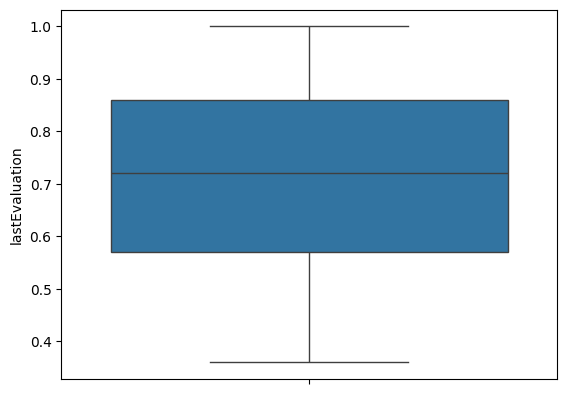

In [18]:
sns.boxplot(data['lastEvaluation'])

<Axes: ylabel='numberOfProjects'>

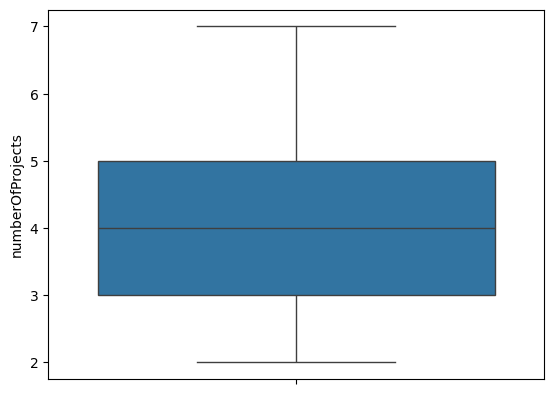

In [19]:
sns.boxplot(data['numberOfProjects'])

<Axes: ylabel='avgMonthlyHours'>

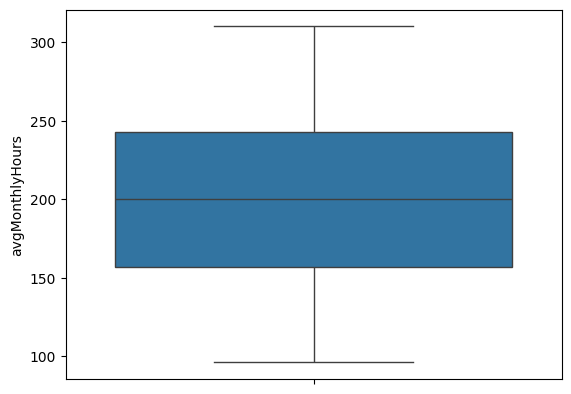

In [20]:
sns.boxplot(data['avgMonthlyHours'])

<Axes: ylabel='timeSpent.company'>

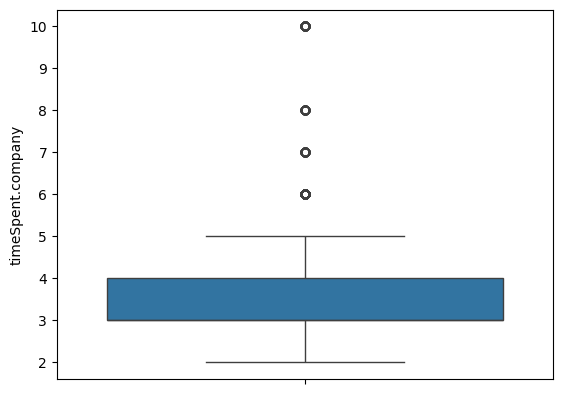

In [21]:
sns.boxplot(data['timeSpent.company'])

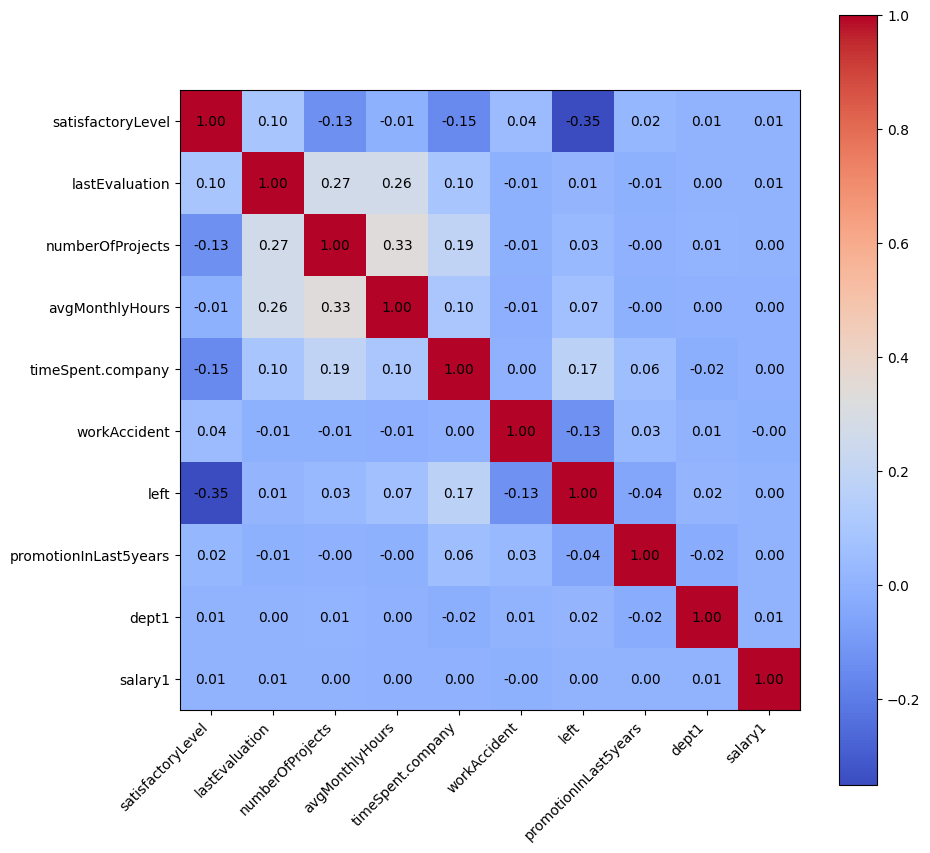

In [22]:
# Create a heatmap
corr = data.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()

# Add labels for each cell
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='center', va='center')

# Add labels for each row and column
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Show the heatmap
plt.show()

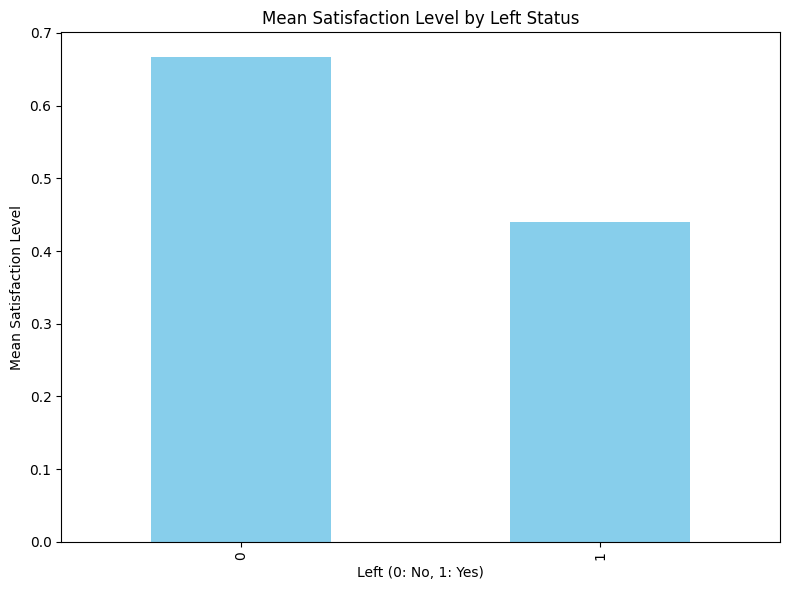

In [23]:
import matplotlib.pyplot as plt

left_satisfaction = data.groupby('left')['satisfactoryLevel'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
left_satisfaction.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Left (0: No, 1: Yes)')
plt.ylabel('Mean Satisfaction Level')
plt.title('Mean Satisfaction Level by Left Status')

# Showing the plot
plt.tight_layout()
plt.show()


Data Normalization

In [24]:
#Normalization of Data
#Data is Normalised using Min-Max Scaler since, the data does not have too many outliers Robust Scaler is not used. Also since the data has a few skewed columns Standard Scaler is not used
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
mmsc_data= mmsc.fit_transform(data)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data.columns=data.columns
mmsc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept1,salary1
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.777778,1.0
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.777778,0.5
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,1.0,0.0,0.777778,0.5


In [45]:
data1=mmsc_data
data1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept1,salary1
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.777778,1.0
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.777778,0.5
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,1.0,0.0,0.777778,0.5


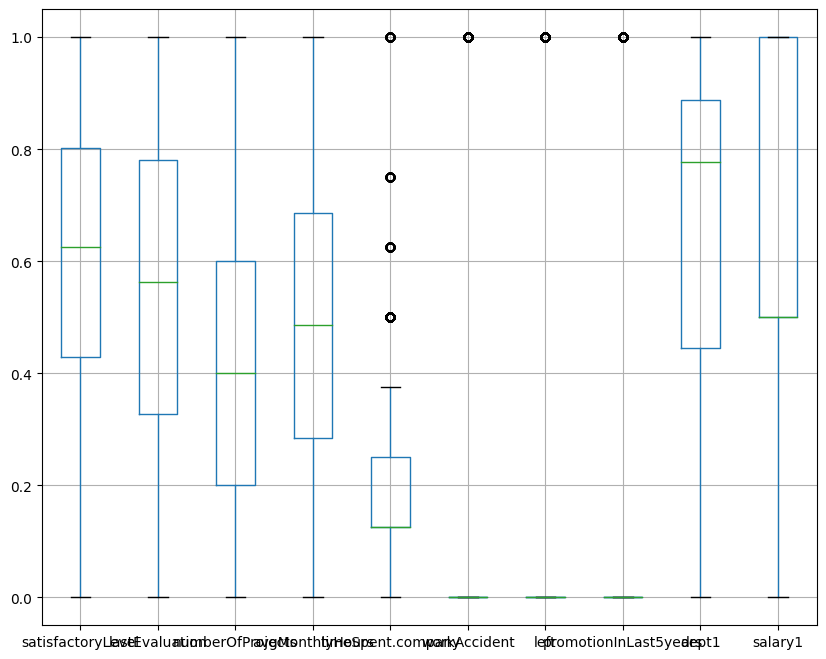

In [30]:
# Box plot before normalization of data
plt.figure(figsize=(10, 8))
data1.boxplot()
plt.show()

Modelling

In [26]:
#Training the Model
X=data1[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company', 'workAccident','promotionInLast5years','salary1']]
Y=data1[['left']]
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeff:  [[-3.43616844  0.4043536  -1.27914495  0.76454635  2.17759528 -1.34567426
  -1.61860698  0.12143992]]
Intercept:  [-0.32903341]
Accuracy Score:  0.8445185493955815
Confusion Matrix: 
[[1943   64]
 [ 309   83]]
Area under the curve:  0.8330397181294041


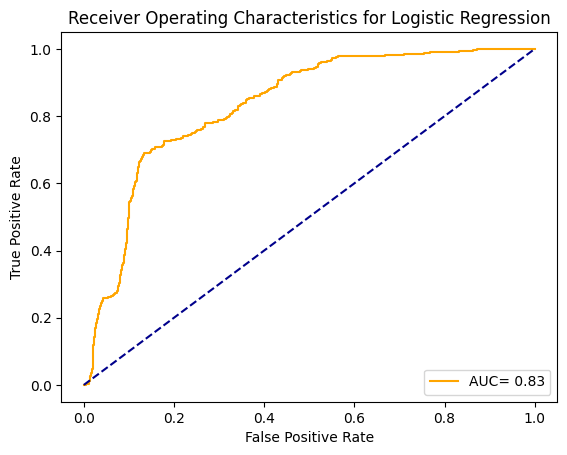

In [27]:
#Using Logistic Regression
LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train,y_train)


print('Coeff: ',LogReg.coef_)
print('Intercept: ',LogReg.intercept_)
Y
#y = column(y, warn=True)
y_pred= LogReg.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

probs= LogReg.predict_proba(x_test)

prob_positive= probs[:,1]
fpr,tpr,threshold= metrics.roc_curve(y_test,prob_positive)
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

#Plotting ROC curve
plt.title("Receiver Operating Characteristics for Logistic Regression")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<ipython-input-28-46eb892c1713>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Accuracy Score RandomForest:  0.9837432263443101
Confusion Matrix: 
[[1999    8]
 [  31  361]]
Area under the curve:  0.9584661592589203


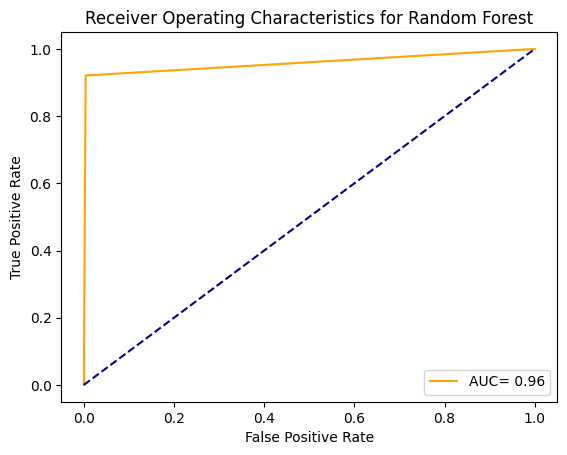

In [28]:
#Using Random Forest
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)
print("Accuracy Score RandomForest: ",metrics.accuracy_score(y_test,y_pred))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

plt.title("Receiver Operating Characteristics for Random Forest")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score of GradientBoost Classifier:  0.980408503543143
Confusion Matrix: 
[[1988   19]
 [  28  364]]
Area under the curve:  0.9595522813011602


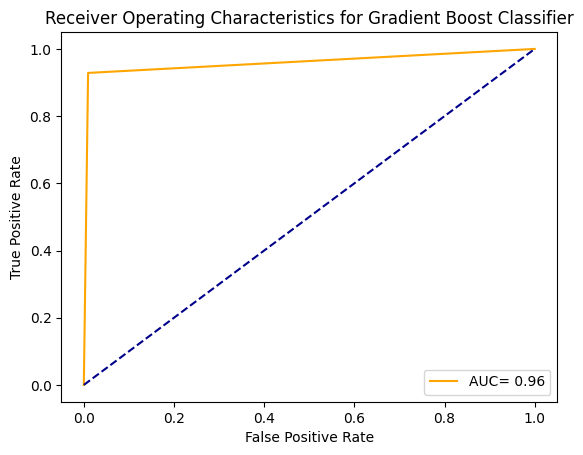

In [29]:
#Using Gradient Boost Classifer
gradient= GradientBoostingClassifier(n_estimators=100,random_state=0)
gradient.fit(x_train,y_train)


y_pred= gradient.predict(x_test)
print("Accuracy Score of GradientBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

plt.title("Receiver Operating Characteristics for Gradient Boost Classifier")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
random_record = pd.DataFrame({
    'satisfactoryLevel': [0.95],
    'lastEvaluation': [0.42],
    'numberOfProjects': [2],
    'avgMonthlyHours': [251],
    'timeSpent.company': [2],
    'workAccident': [3],
    'promotionInLast5years': [0] ,
    'salary1':[1]
})
rf.predict(random_record)

array([1.])

In [ ]:
# Print the random record
print(random_record)

Inference for the Questions
1. On Comparing the performance of algorithms,
The Highest Accuracy of 0.9837 is obtained for Random Forest Algorithm.
Random Forest as an Algorithm also ensures that the data is not over-fitted, it works for categorical data as well.
In general beacause of the underlying principle of Random Trees using several Decision Trees to arrive at prediction, makes it more reliable as an Algorithm.
2. Accuracy as a metrics is not adequate to evaluate model performance as it does not look into the Sensitivity and Specificity of Classification. It is computed as (Number of Correct Classification/Total number of Classification), it does not see on what grounds has an element been mis-classified.
Instead Confusion Matrix, Area Under Cureve(AUC) of ROC-Receiver Operator Curve can be considered as Model Evaluaters
3. It is observed that 'satisfactoryLevel ', 'promotionInLast5years' and 'workAccident' are inversely related to Attrition.
If an Employee has not got a promotion in the last 5 years, there is greater chance that the person might resign from the Organisation.
If an Employee is not satisfied with the Organisation, there is higher chances of quitting
4. The attributes 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company2' are directly related to Attrition.
If an Employee has been associated for longer period in an organisation, there is more likehood of resignation.
If the Last Evaluation of an Employee is not as per his/her expectation there is higher chances of attrition.
If an Employee is made to work for more hours on an average, then it increase the likehood of Attrition.
If an Employees is not moved into various Projects, then there is higher chances an employee may choose to quit